# Esercizio 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import time
import random

In [2]:
random.seed(a=1)
t = time()
def V(x):
    return -0.1*(x**2+0.3)*np.exp(-(x-0.1)**2)
def p(x, T):
    return np.exp(-(1/T)*V(x))

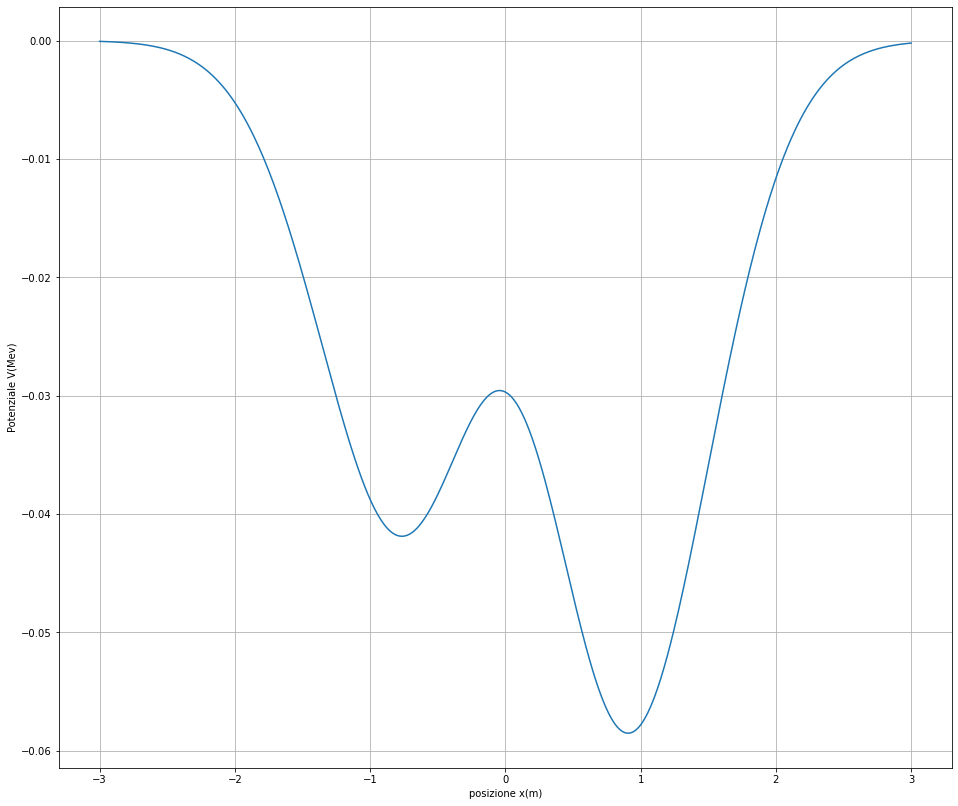

In [3]:
#Tracciamento del potenziale teorico
X = np.linspace(-3, 3, 500)
Y = [V(i) for i in X]
plt.figure(figsize=(16,14))
plt.plot(X, Y)
plt.xlabel("posizione x(m)")
plt.ylabel("Potenziale V(Mev)")
plt.grid()
plt.show()

In [4]:
# Metodo di Metropolis
x_0 = float(input("Scegliere una posizione iniziale fra (-3, 3): "))
while x_0>3 or x_0<-3:
    print("Il valore digitato non rientra nell'intervallo prestabilito, Riprova")
    x_0 = float(input("Scegliere una posizione iniziale fra (-3, 3): "))
    
def Metropolis(N, T, V, p, x_curr):
    E_curr = V(x_curr)
    Posizioni=[]
    Energie=[]
    counter = 0
    Posizioni.append(x_curr)
    Energie.append(E_curr)
    for i in range(N):
        x_new = x_curr+(random.random()-0.5)*6
        if -3<=x_new<=3:
            w = p(x_new, T)/p(x_curr, T)
            if w >1:
                x_curr=x_new
                counter+=1
            else:
                r = random.random()
                if r<=w:
                    x_curr=x_new
                    counter+=1
                else:
                    counter+=1
        else:
            counter+=1
        Posizioni.append(x_curr)
        Energie.append(V(x_curr))
    x_mean = sum(Posizioni)/counter
    E_mean = sum(Energie)/counter
    return Posizioni, Energie, x_mean, E_mean


                    
                
            

Scegliere una posizione iniziale fra (-3, 3): 0


In [5]:
M = Metropolis(100000, 0.05, V, p, x_0)
print("media_posizioni: ", M[2])
print("media_energie: ", M[3])

media_posizioni:  0.11473803108192583
media_energie:  -0.031099892144628306


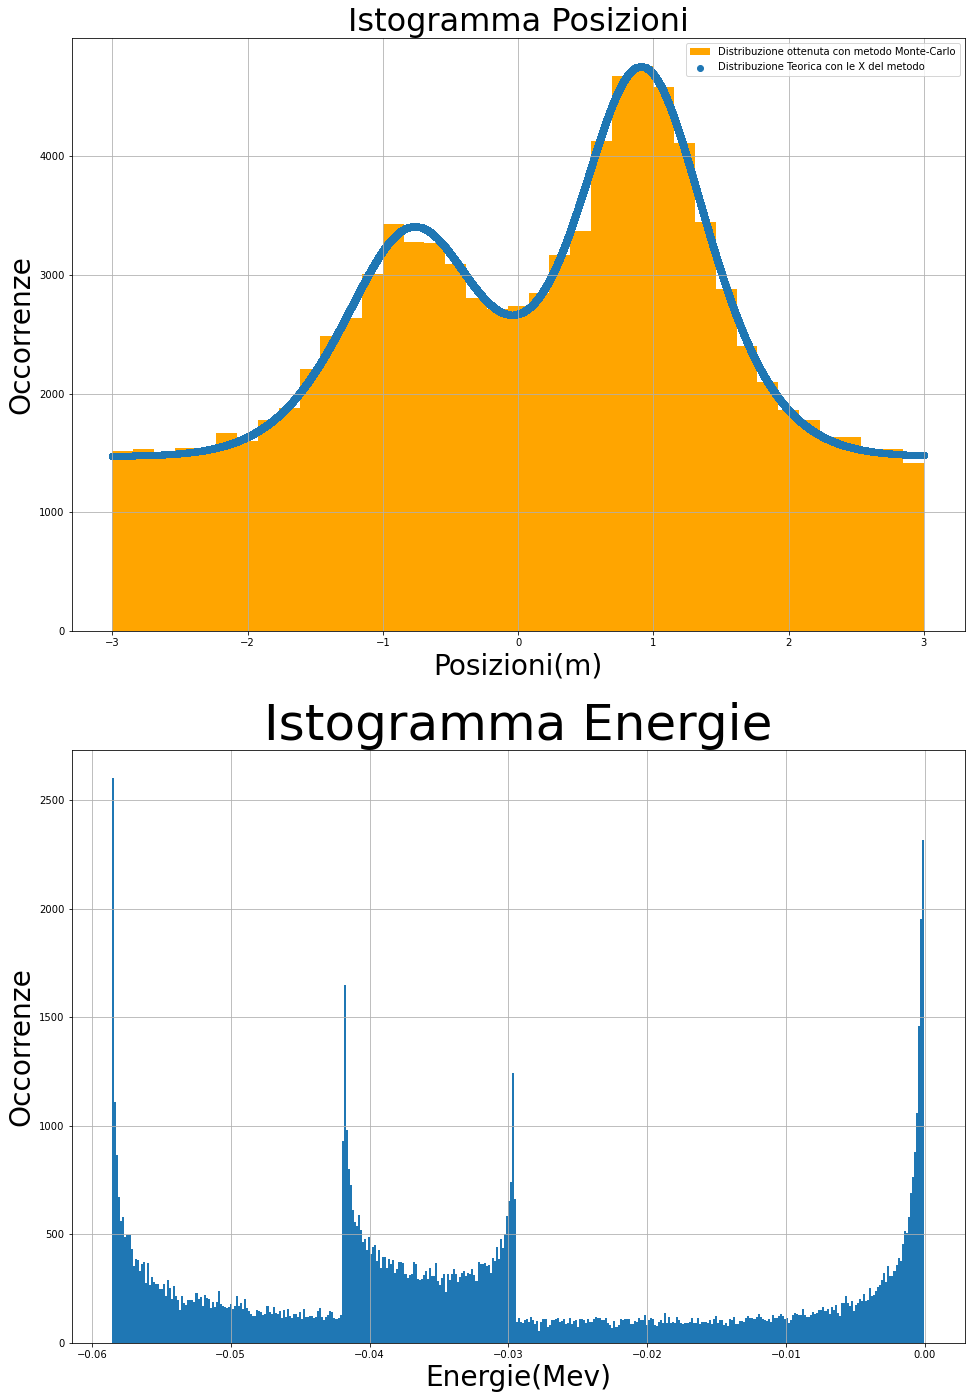

100001.0
100001.0


In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16, 24))
ax1.hist(M[0], bins=int(1+3.322*np.log(100000)), label="Distribuzione ottenuta con metodo Monte-Carlo", color="orange")
ax1.set_title("Istogramma Posizioni", size=32)

#Massimo per la Normalizzazione
x_max=0
hist = ax1.hist(M[0], int(1+3.322*np.log(100000)), alpha=0)
for i in hist[0]:
    if i > x_max:
        x_max=i
        
P = []
P_norm=[]
for i in M[0]:
    P.append(p(i, 0.05))
x_max_scatter=0
for i in P:
    if i > x_max_scatter:
        x_max_scatter=i
for i in P:
    i = i * x_max/x_max_scatter
    P_norm.append(i)


        
ax1.scatter(M[0], P_norm, label="Distribuzione Teorica con le X del metodo")
ax1.legend()

ax2.hist(M[1], bins=400)
ax2.set_title("Istogramma Energie", size=50)
ax1.grid()
ax2.grid()
ax1.set_xlabel("Posizioni(m)", size =28)
ax1.set_ylabel("Occorrenze", size =28)
ax2.set_xlabel("Energie(Mev)", size =28)
ax2.set_ylabel("Occorrenze", size =28)
plt.show()

print(np.sum(ax1.hist(M[0], bins=50)[0]))
print(np.sum(ax1.hist(M[0], bins=50)[0]))

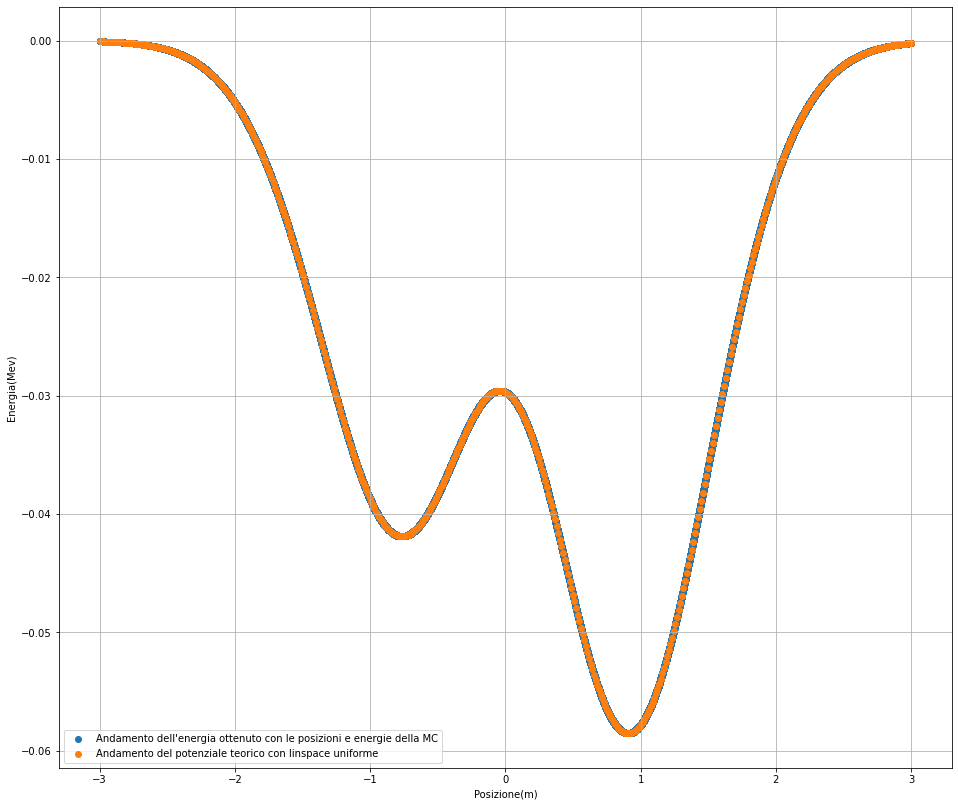

In [7]:
plt.figure(figsize=(16,14))
plt.scatter(M[0],M[1], label = "Andamento dell'energia ottenuto con le posizioni e energie della MC")
plt.scatter(X,Y, label="Andamento del potenziale teorico con linspace uniforme")
plt.xlabel("Posizione(m)")
plt.ylabel("Energia(Mev)")
plt.legend()
plt.grid()
plt.show()

    

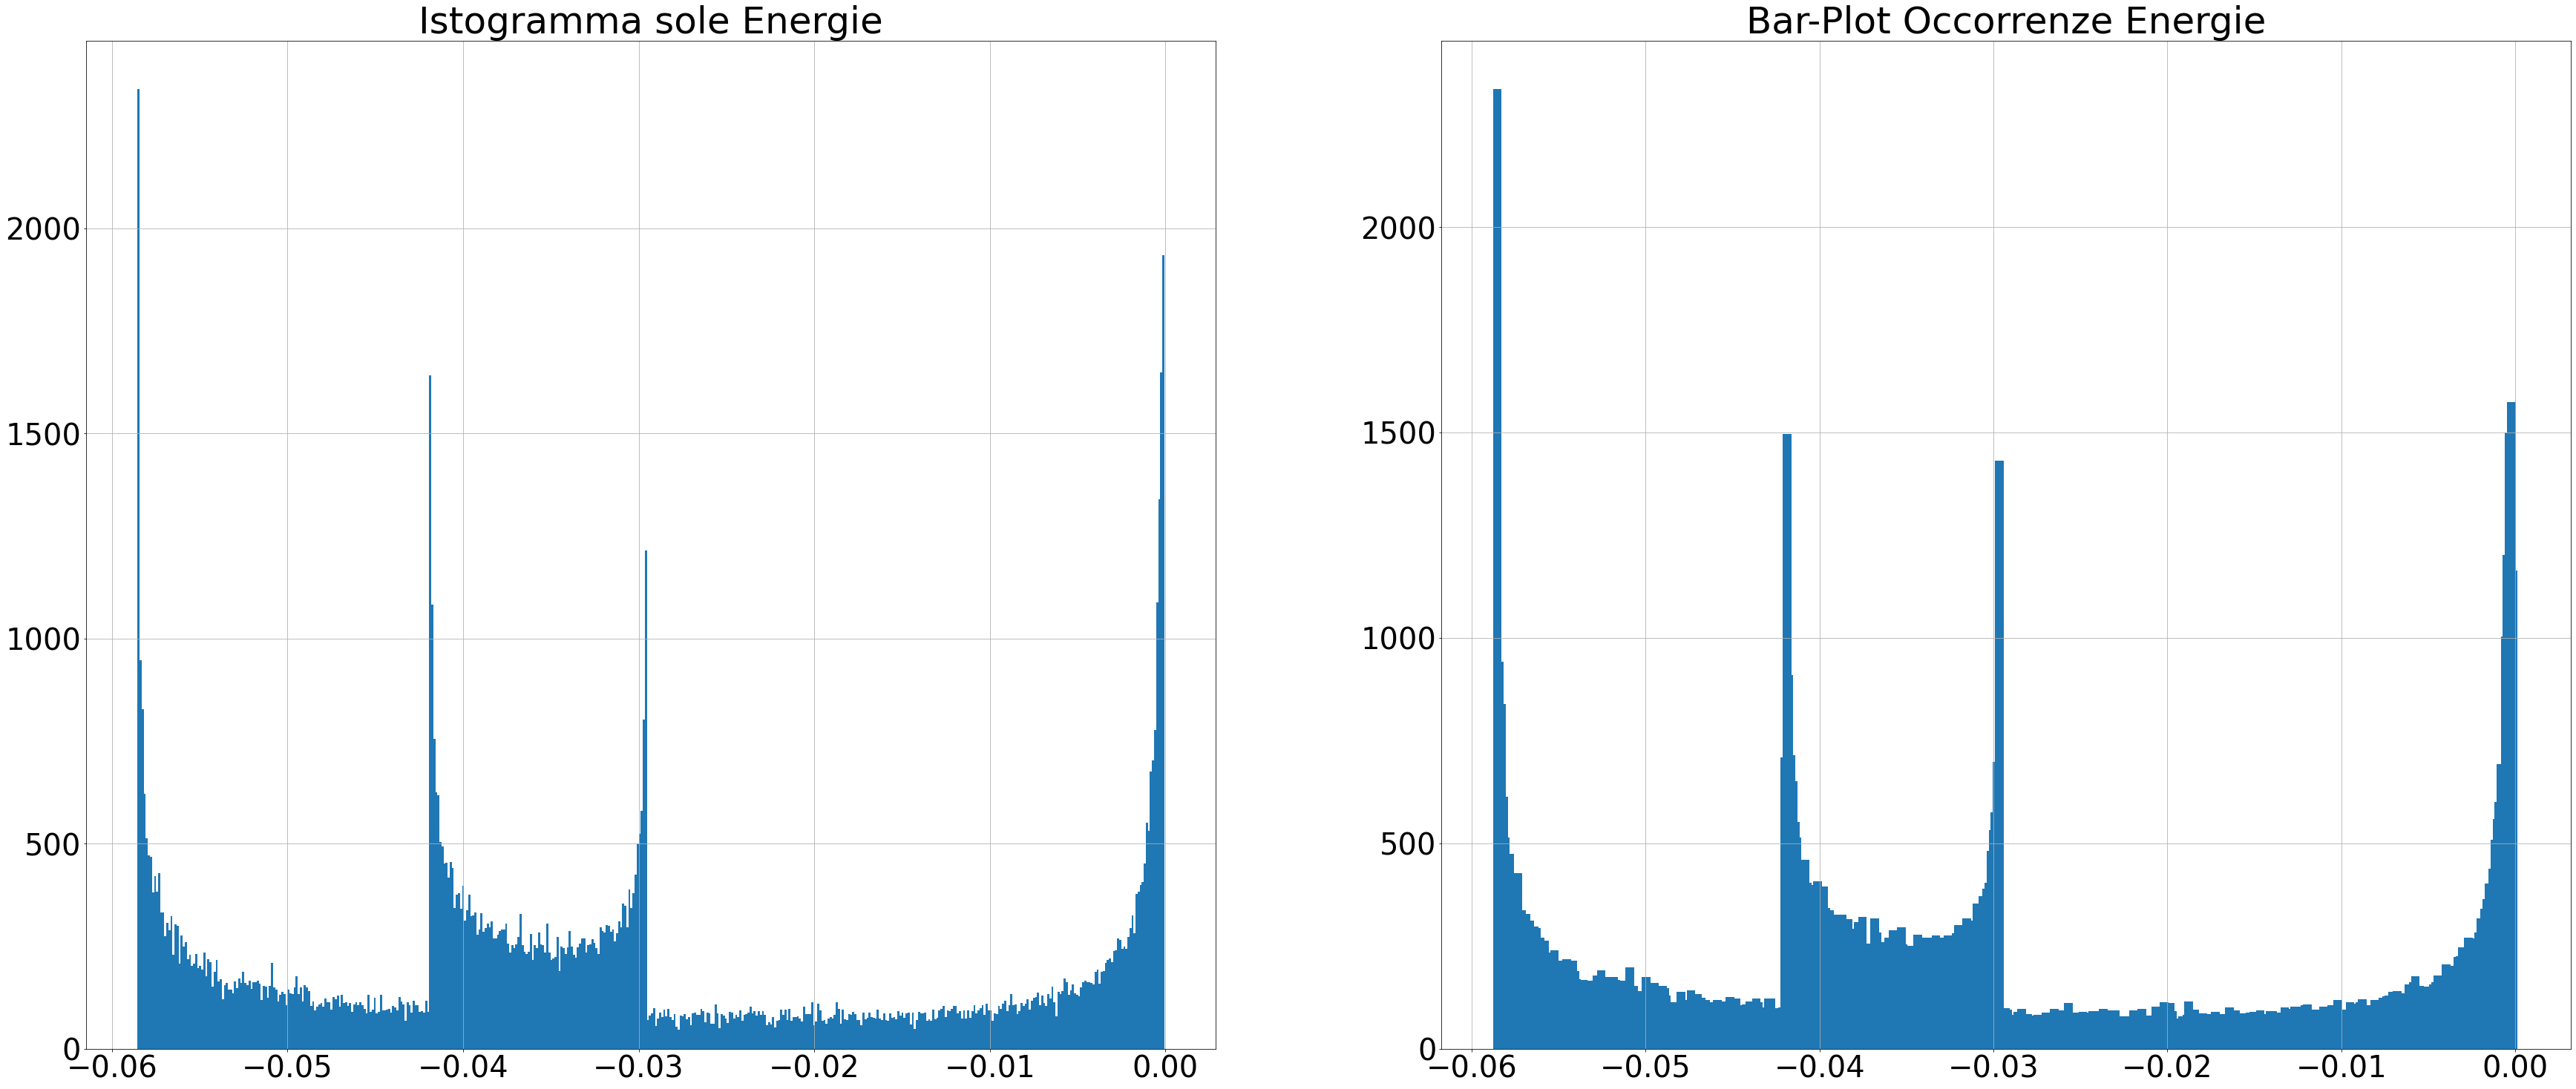

In [8]:
zzx = np.linspace(0, min(M[1]), 500)
zzy = []
for i in range(0,len(zzx)):
    occorrenze = 0
    for j in M[1]:
        if zzx[i]<j<zzx[i-1]:
            occorrenze+=1
    zzy.append(occorrenze)
    
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(60,25))
ax1.hist(M[1], bins=500)
ax2.bar(zzx, zzy, width=(0.0005))
ax1.set_title("Istogramma sole Energie", size=50)
ax1.tick_params(axis='both', which='major', labelsize=40)
ax2.tick_params(axis='both', which='major', labelsize=40)
ax2.set_title("Bar-Plot Occorrenze Energie", size=50)
ax1.grid()
ax2.grid()
plt.show()

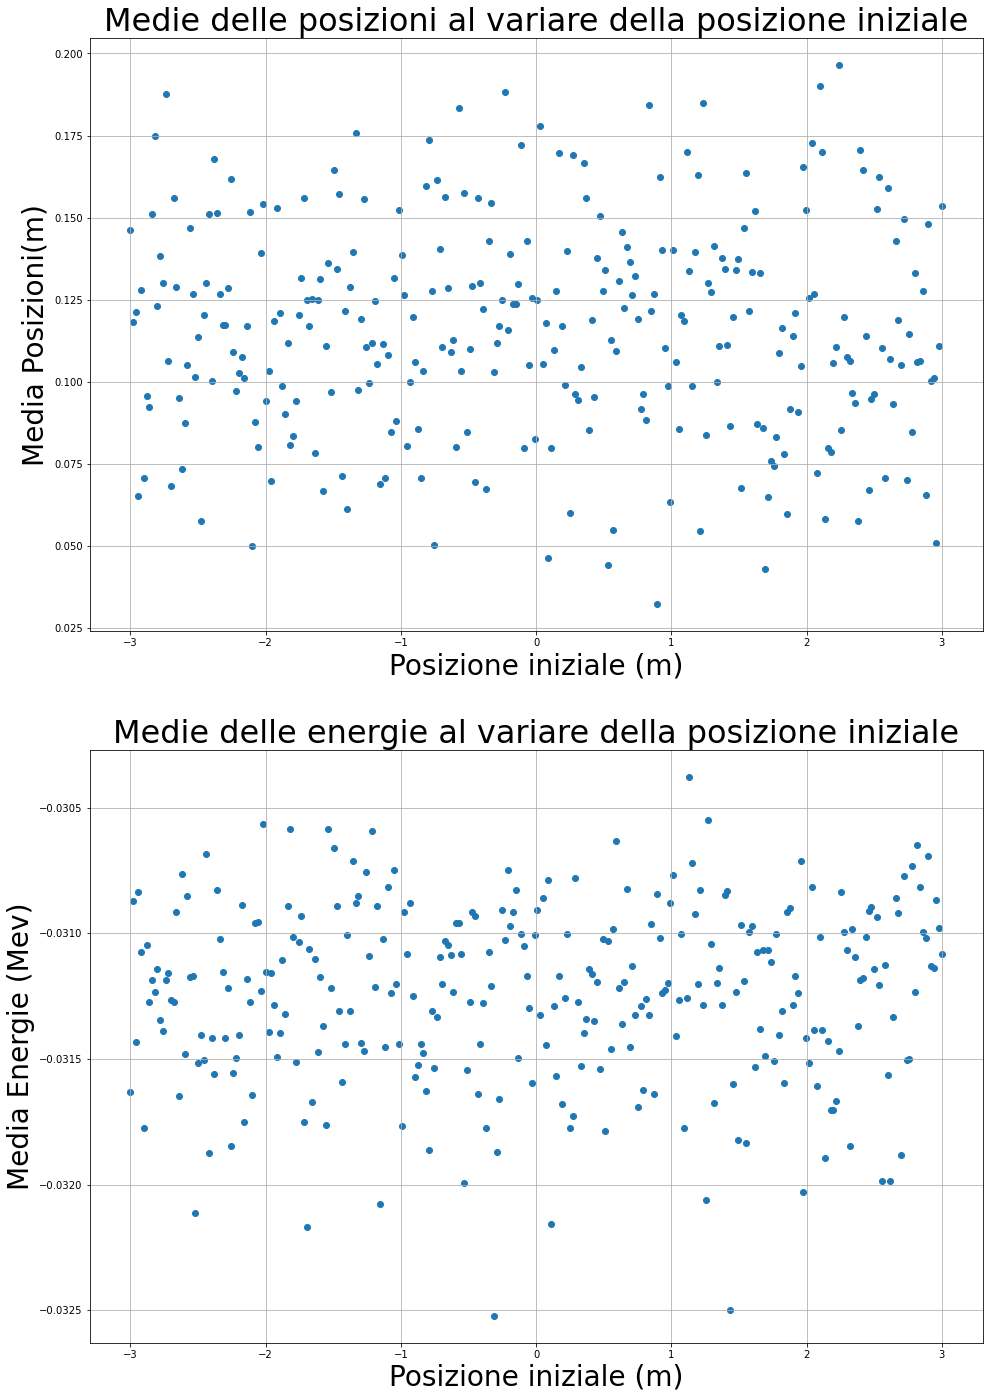

In [9]:
x_input = np.linspace(-3, 3, 300)
medie_posizioni = [Metropolis(10000, 0.05, V, p, i)[2] for i in x_input]
medie_energie = [Metropolis(10000, 0.05, V, p, i)[3] for i in x_input]


fig, (ax1,ax2)=plt.subplots(2,1, figsize=(16,24))
ax1.scatter(x_input, medie_posizioni)
ax1.set_title("Medie delle posizioni al variare della posizione iniziale", size=32)
ax2.scatter(x_input, medie_energie)
ax2.set_title("Medie delle energie al variare della posizione iniziale", size=32)
ax1.grid()
ax2.grid()
ax1.set_xlabel("Posizione iniziale (m)", size=28)
ax1.set_ylabel("Media Posizioni(m)", size=28)
ax2.set_xlabel("Posizione iniziale (m)", size=28)
ax2.set_ylabel("Media Energie (Mev)", size=28)
plt.show()

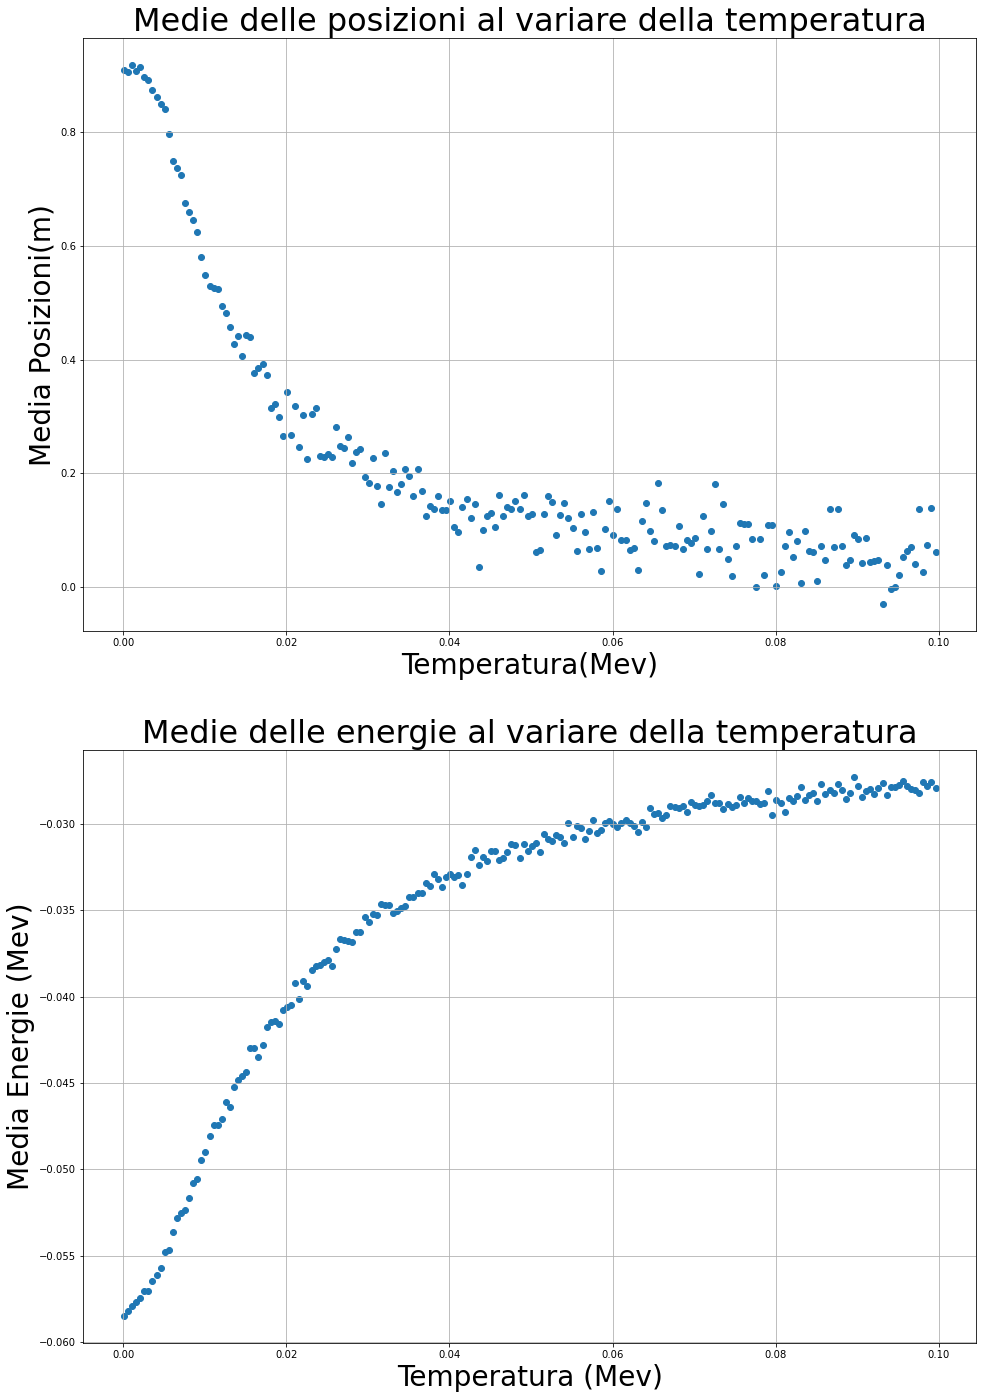

In [10]:
T_input = np.arange(0.0001, 0.1, 0.0005)
medie_posizioni = [Metropolis(10000, i, V, p, x_0)[2] for i in T_input]
medie_energie = [Metropolis(10000, i, V, p, x_0)[3] for i in T_input]


fig, (ax1,ax2)=plt.subplots(2,1, figsize=(16,24))
ax1.scatter(T_input, medie_posizioni)
ax1.set_title("Medie delle posizioni al variare della temperatura", size=32)
ax2.scatter(T_input, medie_energie)
ax2.set_title("Medie delle energie al variare della temperatura", size=32)
ax1.grid()
ax2.grid()
ax1.set_xlabel("Temperatura(Mev)", size=28)
ax1.set_ylabel("Media Posizioni(m)", size=28)
ax2.set_xlabel("Temperatura (Mev)", size=28)
ax2.set_ylabel("Media Energie (Mev)", size=28)
plt.show()

In [11]:
t2 = time()
print("Tempo impiegato: ", t2-t, "(s)")

Tempo impiegato:  132.45931816101074 (s)
